In [20]:
#  Open, Plot and Explore Lidar Data in Raster Format with Python
# https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/open-lidar-raster-python/

In [41]:
# Open Raster Data in Python

In [42]:
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import os
plt.ion()

from shapely.geometry import Polygon, mapping
from rasterio.mask import mask
# A package created for this class that will be discussed later in this lesson
import earthpy as et

# Set standard plot parameters for uniform plotting
plt.rcParams['figure.figsize'] = (8, 8)

# Prettier plotting with seaborn
import seaborn as sns; 
sns.set(font_scale=1.5)
sns.set_style("white")

In [43]:
# Open raster data
lidar_dem = rio.open('C:/Users/USUARIO/earth-analytics/data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')

In [44]:
# Query the spatial extent of the data
lidar_dem.bounds

BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)

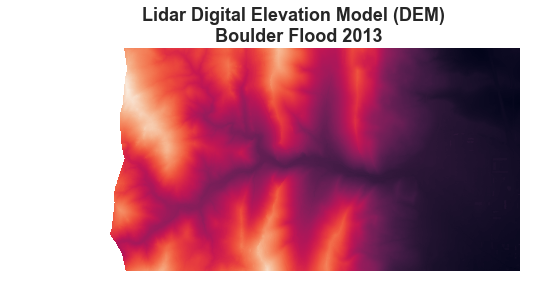

In [45]:
# Plot the dem using raster.io
fig, ax = plt.subplots()
show(lidar_dem, 
     title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013", 
     ax=ax)
ax.set_axis_off()

In [46]:
lidar_dem.close()

In [47]:
with rio.open('C:/Users/USUARIO/earth-analytics/data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    # Convert / read the data into a numpy array:
    lidar_dem_im = src.read()
    # Create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)
    # Get bounds of object
    bounds = src.bounds

In [48]:
# This is the format that matplotlib wants
print("spatial extent:", spatial_extent)
# This is the format that rasterio provides with the bounds attribute
print("rasterio bounds:", bounds)

spatial extent: (472000.0, 476000.0, 4434000.0, 4436000.0)
rasterio bounds: BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)


In [49]:
with rio.open('C:/Users/USUARIO/earth-analytics/data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    # convert / read the data into a numpy array: masked= True turns `nodata` values to nan
    lidar_dem_im = src.read(1, masked=True)
    # create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)

print("object shape:", lidar_dem_im.shape)
print("object type:", type(lidar_dem_im))

object shape: (2000, 4000)
object type: <class 'numpy.ma.core.MaskedArray'>


Text(0.5,1,'Lidar Digital Elevation Model \n Pre 2013 Boulder Flood | Lee Hill Road')

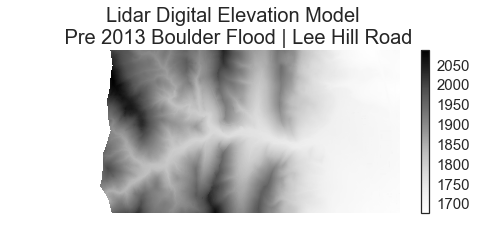

In [50]:
fig, ax = plt.subplots(figsize = (8,3))
lidar_plot = ax.imshow(lidar_dem_im, 
                       cmap='Greys', 
                       extent=spatial_extent)
ax.set_title("Lidar Digital Elevation Model \n Pre 2013 Boulder Flood | Lee Hill Road", fontsize= 20)
fig.colorbar(lidar_plot)
# turn off the x and y axes for prettier plotting
ax.set_axis_off()
plt.show()

In [51]:
# Create a new spatial extent 
print("Full Spatial extent of raster:", spatial_extent)
# Define a spatial extent that is "smaller"
zoomed_extent = [472500, 473030, 4434000, 4435030]
print("Zoomed in raster extent:", zoomed_extent)

Full Spatial extent of raster: (472000.0, 476000.0, 4434000.0, 4436000.0)
Zoomed in raster extent: [472500, 473030, 4434000, 4435030]


In [52]:
with rio.open('C:/Users/USUARIO/earth-analytics/data/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif') as src:
    # convert / read the data into a numpy array: masked= True turns `nodata` values to nan
    lidar_dem_post = src.read(1, masked=True)
    # create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)

print("object shape:", lidar_dem_post.shape)
print("object type:", type(lidar_dem_post))

object shape: (2000, 4000)
object type: <class 'numpy.ma.core.MaskedArray'>


Text(0.5,1,'Lidar Digital Elevation Model \n Post 2013 Boulder Flood | Lee Hill Road')

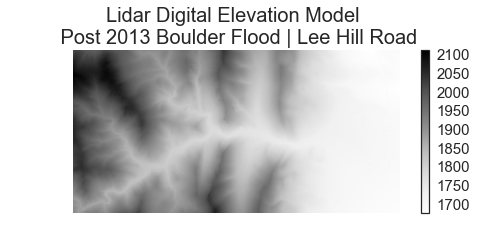

In [53]:
fig, ax = plt.subplots(figsize = (8,3))
lidar_plot = ax.imshow(lidar_dem_post, 
                       cmap='Greys', 
                       extent=spatial_extent)
ax.set_title("Lidar Digital Elevation Model \n Post 2013 Boulder Flood | Lee Hill Road", fontsize= 20)
fig.colorbar(lidar_plot)
# turn off the x and y axes for prettier plotting
ax.set_axis_off()
plt.show()

In [34]:
diff = lidar_dem_im - lidar_dem_post

Text(0.5,1,'Lidar Digital Elevation Model \n Difference 2013 Boulder Flood | Lee Hill Road')

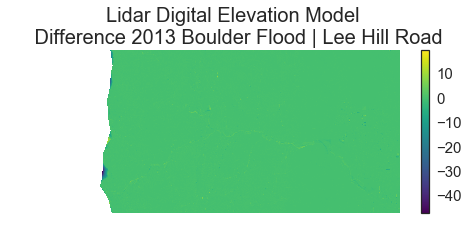

In [40]:
fig, ax = plt.subplots(figsize = (8,3))
lidar_plot = ax.imshow(diff, 
                       cmap='viridis', 
                       extent=spatial_extent)
ax.set_title("Lidar Digital Elevation Model \n Difference 2013 Boulder Flood | Lee Hill Road", fontsize= 20)
fig.colorbar(lidar_plot)
# turn off the x and y axes for prettier plotting
ax.set_axis_off()
plt.show()